In [816]:
# Importando as bibliotecas necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [817]:
# Importando o arquivo .csv para um dataframe
df = pd.read_csv('C:/Users/engca/Desktop/Chamados.csv',sep = ";", parse_dates=True, index_col='Id chamado')

In [818]:
# Identificar o volume de dados do DataFrame
print('\nDIMENSÕES DO DATAFRAME:\n')
print('Variáveis:\t{}'.format(df.shape[1]))
print('Entradas:\t{}'.format(df.shape[0]))


DIMENSÕES DO DATAFRAME:

Variáveis:	47
Entradas:	6867


In [819]:
# Visualização do dataframe
df.tail()

,Data de reporte,Tipo,Área,Cliente,Edifício,Local,Estado,Prioridade,Descrição,Tipo de reporte,...,Prioridade.1,Resolução,Custo de Outros custos,Custo de Materiais,Custo de serviços,Custo de MO,Custo total,SLA,Nome do Centro de Custos,Equipamentos
Id chamado,,,,,,,,,,,,,,,,,,,,,
5156248,2023-04-03 14:01:46,Elétrica - Eventuais,Elétrica,Conselho Nacional de Justiça - PREMIUM,1352 - PREMIUM,1352.01.06.01 - PREMIUM - Torre E - Térreo - L...,A aguardar aprovação,Alta,ATIVAR PONTOS ELETRICO/REDE TERREO TORRE E \nS...,CONTACT,...,3,Não resolvido,"0,00","0,00",NaN,"0,00","0,00",Sem SLA,Sem Centro de Custos,NaN
5156291,2023-04-03 14:10:30,Civil - Eventuais,Civil,Conselho Nacional de Justiça - PREMIUM,1352 - PREMIUM,1352.02.04.01 - PREMIUM - Torre F - 2° Pavimen...,A aguardar aprovação,Alta,SALA 204 TORRE F FIXAR QUADRO\nSOLICITANTE:TH...,CONTACT,...,3,Não resolvido,"0,00","0,00",NaN,"0,00","0,00",Sem SLA,Sem Centro de Custos,NaN
5156573,2023-04-03 14:53:10,Elétrica - Eventuais,Elétrica,Conselho Nacional de Justiça - PREMIUM,1352 - PREMIUM,1352.01.06.02 - PREMIUM - Torre E - Térreo - O...,A aguardar aprovação,Alta,TERREO TORRE E DESATIVAR PONTOS REDE/ELETRICO\...,CONTACT,...,3,Não resolvido,"0,00","0,00",NaN,"0,00","0,00",Sem SLA,Sem Centro de Custos,NaN
5157395,2023-04-03 17:17:40,Civil - Eventuais,Civil,Conselho Nacional de Justiça - PREMIUM,1352 - PREMIUM,1352.02.08.01 - PREMIUM - Torre F - Garragem 1...,A aguardar aprovação,Alta,SALA 09 G1 TORRE F SUBSTITUIÇÃO DE FECHADURA D...,CONTACT,...,3,Não resolvido,"0,00","0,00",NaN,"0,00","0,00",Sem SLA,Sem Centro de Custos,NaN
5157585,2023-04-03 18:08:46,Hidrossanitário - Preventivo,Hidrossanitário,Conselho Nacional de Justiça - PREMIUM,1352 - PREMIUM,1352.01.03.01 - PREMIUM - Torre E - 3° Pavimen...,A aguardar aprovação,Alta,BANHEIRO MASCULINO 3ºANDAR TORRE E \nDESOBSTR...,CONTACT,...,3,Não resolvido,"0,00","0,00",NaN,"0,00","0,00",Sem SLA,Sem Centro de Custos,NaN


In [820]:
# Verificar os tipos das variaveis do DataFrame
print('\nTIPOS DE VARIÁVEIS DO DATAFRAME:\n')
display(df.dtypes)


TIPOS DE VARIÁVEIS DO DATAFRAME:



Data de reporte                                  object
Tipo                                             object
Área                                             object
Cliente                                          object
Edifício                                         object
Local                                            object
Estado                                           object
Prioridade                                       object
Descrição                                        object
Tipo de reporte                                  object
Reportado por                                    object
Fornecedor                                      float64
Tipologia local                                  object
Aprovado por                                     object
Aprovado em                                      object
Iniciado por                                     object
Iniciado em                                      object
Pausado por                                     

In [821]:
# Ordenar em ordem decrescente as variavieis por seus valores ausentes
print('\nVALORES AUSENTES:\n')
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100


VALORES AUSENTES:



Pausado por                                     100.000000
Pausado em                                      100.000000
Custo de serviços                               100.000000
Motivo de pausa                                 100.000000
Fornecedor                                      100.000000
Equipamentos                                     99.970875
Observações                                      99.635940
Data de confirmação                              96.446774
Descrição do estado                              54.230377
Tempo para fechar após inicio (segundos)          0.203874
Tempo para fechar (segundos)                      0.203874
Tempo para aprovar (segundos)                     0.203874
Tempo para fechar após aprovação (segundos)       0.203874
Duração (segundos)                                0.203874
Tempo para iniciar (segundos)                     0.203874
Fechado por                                       0.203874
Tempo para iniciar após aprovação (segundos)      0.2038

In [822]:
# Valores únicos
print('\nVALORES ÚNICOS:\n')
print(df.nunique().sort_values())


VALORES ÚNICOS:

Custo de serviços                                  0
Motivo de pausa                                    0
Pausado em                                         0
Pausado por                                        0
Fornecedor                                         0
Custo de Outros custos                             1
Nome do Centro de Custos                           1
Custo de Materiais                                 1
Custo de MO                                        1
Custo total                                        1
Aprovado por                                       1
Tipologia local                                    1
Equipamentos                                       1
SLA                                                1
Edifício                                           1
Cliente                                            1
Tipo de reporte                                    2
Iniciado por                                       2
Estado                      

In [823]:
# Remover colunas indesejadas para um novo DataFrame
df_clean = df.copy()
df_clean.drop(df.columns.difference(['Data de reporte','Tipo','Local','Descrição']), axis=1, inplace=True) #Inplace serve para aplicar a função na variavel original sem criar uma copia

In [824]:
#Renomeando a coluna data reporte
df_clean = df_clean.rename(columns={'Data de reporte': 'Data/Hora'})

In [825]:
#Separando Data e Hora da Coluna Data/Hora e removendo a coluna antiga
df_clean[['Data', 'Hora']] = df_clean['Data/Hora'].str.split(' ', expand=True)
df_clean = df_clean.drop('Data/Hora', axis=1)

In [826]:
#Convertendo o tipo da coluna Data
df_clean['Data'] = pd.to_datetime(df_clean["Data"])


In [827]:
# Incluindo coluna data do EventTime apenas com mês e ano
df_clean['Ano'] = df_clean["Data"].apply(lambda x: "{}".format(x.year))

In [828]:
#Separando Data por Mes
df_clean['Mes'] = df_clean["Data"].apply(lambda x: "{:02d}".format(x.month))

In [829]:
#Filtrando Torre e pavimento da Local local
df_clean['Pavimento'] = df_clean['Local'].str.split(' - ').str[3:4].str.join(' - ')

In [830]:
#Separando por Torre
df_clean['Torre'] = df_clean['Local'].str.split(' - ').str[2:3].str.join(' - ')

In [831]:
#Organizando a posição das colunas
df_clean = df_clean[['Data','Mes','Ano','Hora','Tipo','Pavimento','Torre','Descrição']]

In [832]:
#Criando novo coluna com o nome dos Solicitantes dos chamados
df_clean['Solicitante'] = df_clean['Descrição'].str.extract(r'SOLICITANTE[:;]([A-Z][a-z]+)', flags=re.IGNORECASE)


In [833]:
#Criando novo coluna com o nome dos Solicitantes dos chamados
df_clean['Sala'] = df_clean['Descrição'].str.extract(r'SALA\s*(\d+)', flags=re.IGNORECASE)

In [834]:
df_clean.drop(df_clean[df_clean.Pavimento == 'Laje Técnica'].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.Pavimento == '4° Pavimento'].index, axis=0, inplace=True)

In [835]:
palavras_chave = ['DIMINUIR', 'QUENTE', 'DELIGADO']
df_clean['Sensacao'] = np.where(df_clean['Descrição'].str.contains('|'.join(palavras_chave), case=False), "QUENTE", "FRIO")
df_clean.drop('Descrição', axis=1, inplace=True)

In [836]:
# Analisando o ano de 2022
df_clean = df_clean[df_clean['Ano'] == '2022']

In [837]:
#Filtrando o Tipo: Ar Condicionado
df_AC = df_clean.copy()
df_AC = df_clean.loc[df_clean.Tipo.isin(['Ar Condicionado - Operação'])]

In [838]:
# Ordenar em ordem decrescente as variavieis por seus valores ausentes
print('\nVALORES AUSENTES:\n')
(df_AC.isnull().sum() / df_AC.shape[0]).sort_values(ascending=False)*100


VALORES AUSENTES:



Sala           18.071066
Solicitante    13.604061
Data            0.000000
Mes             0.000000
Ano             0.000000
Hora            0.000000
Tipo            0.000000
Pavimento       0.000000
Torre           0.000000
Sensacao        0.000000
dtype: float64

In [839]:
df_AC.tail(15)

,Data,Mes,Ano,Hora,Tipo,Pavimento,Torre,Solicitante,Sala,Sensacao
Id chamado,,,,,,,,,,
4567483,2022-12-20,12,2022,10:46:46,Ar Condicionado - Operação,2° Pavimento,Torre E,IRENE,204,FRIO
4568954,2022-12-20,12,2022,14:08:49,Ar Condicionado - Operação,2° Pavimento,Torre E,LAIANY,204,QUENTE
4569001,2022-12-20,12,2022,14:15:32,Ar Condicionado - Operação,Semienterrado,Torre E,KELLY,NaN,FRIO
4572661,2022-12-21,12,2022,10:01:21,Ar Condicionado - Operação,2° Pavimento,Torre E,IRENE,204,FRIO
4574601,2022-12-21,12,2022,14:19:31,Ar Condicionado - Operação,Semienterrado,Torre F,ROSANA,NaN,FRIO
4575350,2022-12-21,12,2022,17:10:26,Ar Condicionado - Operação,Térreo,Torre F,RAPHAELLA,06,FRIO
4578282,2022-12-22,12,2022,09:29:49,Ar Condicionado - Operação,Semienterrado,Torre F,TALITA,NaN,FRIO
4578797,2022-12-22,12,2022,10:01:54,Ar Condicionado - Operação,2° Pavimento,Torre E,IRENE,204,FRIO
4578903,2022-12-22,12,2022,10:14:53,Ar Condicionado - Operação,Semienterrado,Torre F,ROSANA,NaN,FRIO


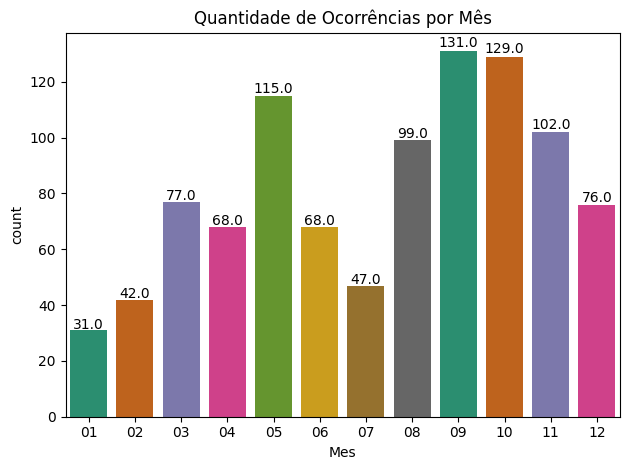

In [840]:
fig, ax = plt.subplots()

sns.countplot(x = df_AC.Mes, ax=ax, palette = "Dark2")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, height*1.01), ha='center')


ax.set_title('Quantidade de Ocorrências por Mês')

plt.tight_layout()

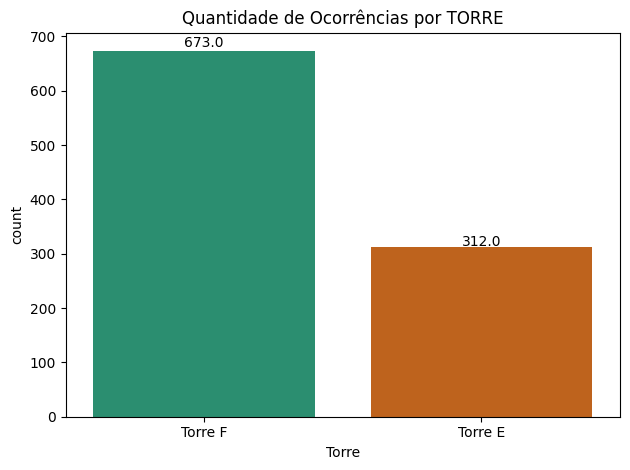

In [841]:
fig, ax = plt.subplots()

sns.countplot(x = df_AC.Torre, ax=ax, palette = "Dark2")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, height*1.01), ha='center')

ax.set_title('Quantidade de Ocorrências por TORRE')

plt.tight_layout()

In [842]:
#Filtrando o Tipo: Ar Condicionado
df_AC_F = df_AC.loc[df_AC.Torre.isin(['Torre F'])]

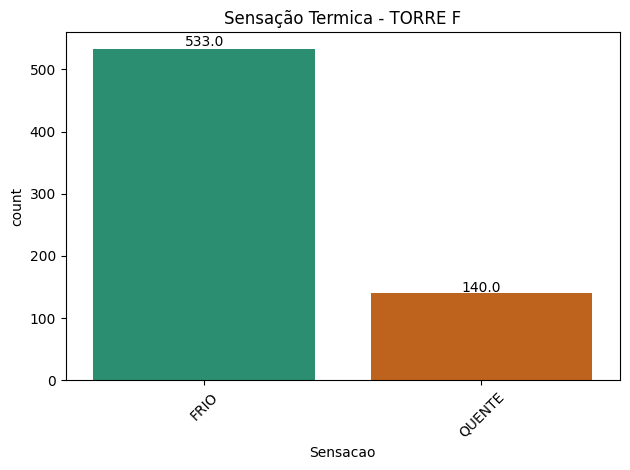

In [843]:
fig, ax = plt.subplots()

sns.countplot(x = df_AC_F.Sensacao, ax=ax, palette = "Dark2")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, height*1.01), ha='center')

labels = ax.get_xticklabels() 
for label in labels:
    label.set_rotation(45)




ax.set_title('Sensação Termica - TORRE F')

plt.tight_layout()

In [844]:
df_AC_F = df_AC_F.loc[df_AC_F.Sensacao.isin(['FRIO'])]

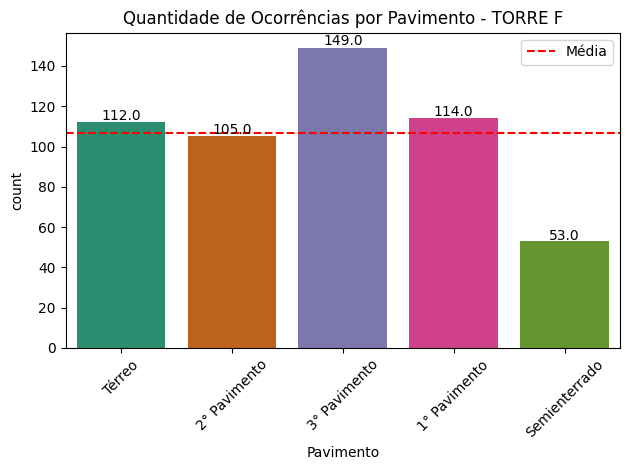

In [845]:
fig, ax = plt.subplots()

sns.countplot(x = df_AC_F.Pavimento, ax=ax, palette = "Dark2")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, height*1.01), ha='center')

labels = ax.get_xticklabels() 
for label in labels:
    label.set_rotation(45)

ax.axhline(y=df_AC_F.Pavimento.value_counts().mean(), color='r', linestyle='--', label='Média')


ax.set_title('Quantidade de Ocorrências por Pavimento - TORRE F')

ax.legend()

plt.tight_layout()

In [846]:
#Filtrando o Tipo: Ar Condicionado
df_AC_F = df_AC_F.loc[df_AC_F.Pavimento.isin(['Térreo','1° Pavimento','3° Pavimento'])]


In [847]:
df_counts = df_AC_F['Sala'].value_counts().reset_index().rename(columns={'index': 'Sala', 'Sala': 'count'})
df_counts = df_counts.sort_values('count', ascending=False)

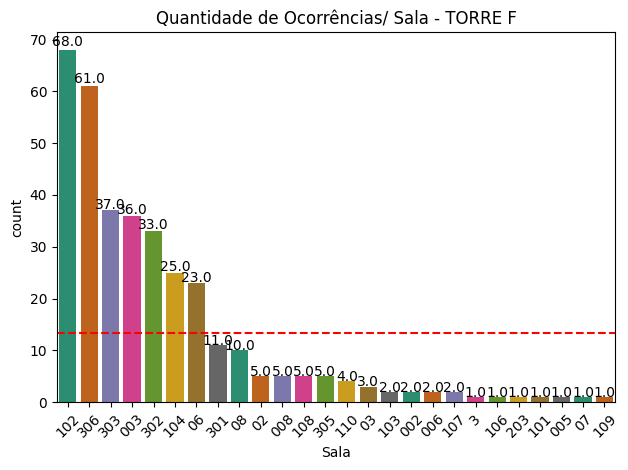

In [848]:
fig, ax = plt.subplots()

sns.countplot(x='Sala', data=df_AC_F, order=df_counts['Sala'], palette='Dark2', ax=ax)

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, height*1.01), ha='center')

labels = ax.get_xticklabels() 
for label in labels:
    label.set_rotation(45)

ax.axhline(y=df_AC_F.Sala.value_counts().mean(), color='r', linestyle='--', label='Média')


ax.set_title('Quantidade de Ocorrências/ Sala - TORRE F')

plt.tight_layout()